In [28]:
import pandas as pd
import numpy as np

## Preprocessing Gas Price Data

In [177]:
gas_dataset = pd.read_csv('gas_dataset.csv')

In [178]:
gas_dataset

open    close      low      high         avgGas  \
0     51.4000  50.4000  30.2900   63.0500   80868.519046   
1     74.9800  49.4400  36.8900  119.4100   85449.256791   
2     59.3500  72.7700  42.2300  121.5400   82192.413722   
3     82.8200  70.2500  36.0000   98.4700   82451.786800   
4     68.5000  59.6100  27.3600   84.8300   84236.446559   
...       ...      ...      ...       ...            ...   
5479  14.3790  14.0238  12.0000   18.1021  166736.391980   
5480  14.8214  14.6782  12.0000   17.8660  157472.907955   
5481  14.6852  14.7600  12.5715   20.0906  115399.969702   
5482  13.7311  13.6790  12.2000   16.6647  119084.124717   
5483  14.2724  14.1978  12.1000   18.4967  151872.965195   

                     timestamp  
0     2022-04-26T13:34:21.641Z  
1     2022-04-26T14:00:09.549Z  
2     2022-04-26T15:00:08.630Z  
3     2022-04-26T16:01:05.379Z  
4     2022-04-26T17:00:58.575Z  
...                        ...  
5479  2022-12-11T05:00:28.462Z  
5480  2022-12-11T06:00:33.482Z  
5481  2022-12-11T07:00:37.563Z  
5482  2022-12-11T08:00:42.075Z  
5483  2022-12-11T09:00:46.209Z  

[5484 rows x 6 columns]

In [179]:
gas_average = gas_dataset.apply(lambda x: round((x['low'] + x['high']) / 2, 4), axis = 1)

In [180]:
gas_average.describe()

count    5484.000000
mean       38.881064
std       140.416634
min         3.520000
25%        13.560925
50%        21.802500
75%        39.437500
max      5892.560000
dtype: float64

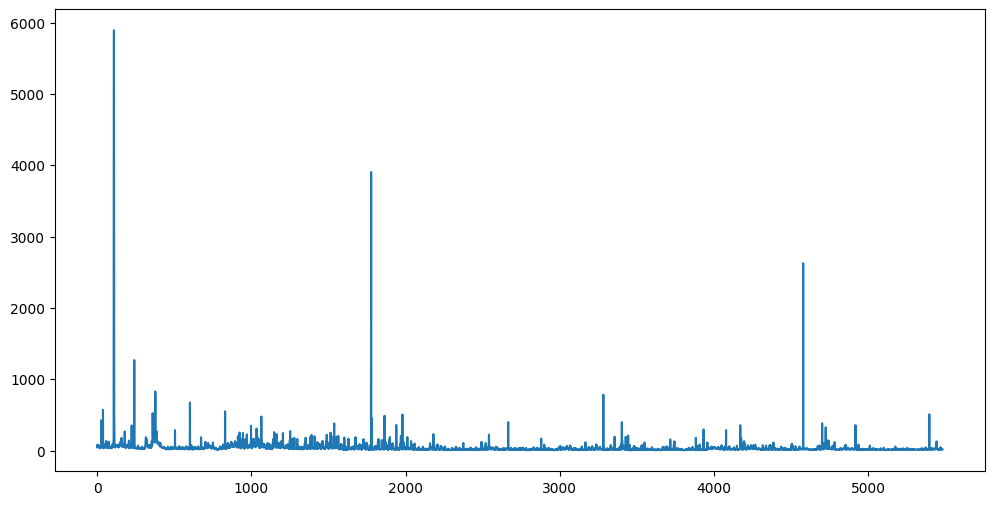

In [181]:
gas_average.plot(figsize = (12,6));

In [182]:
gas_average = gas_average.apply(lambda x: x if x < 1000 else np.nan)

In [183]:
gas_average.describe()

count    5478.000000
mean       34.822632
std        47.757974
min         3.520000
25%        13.556275
50%        21.792500
75%        39.315000
max       828.400000
dtype: float64

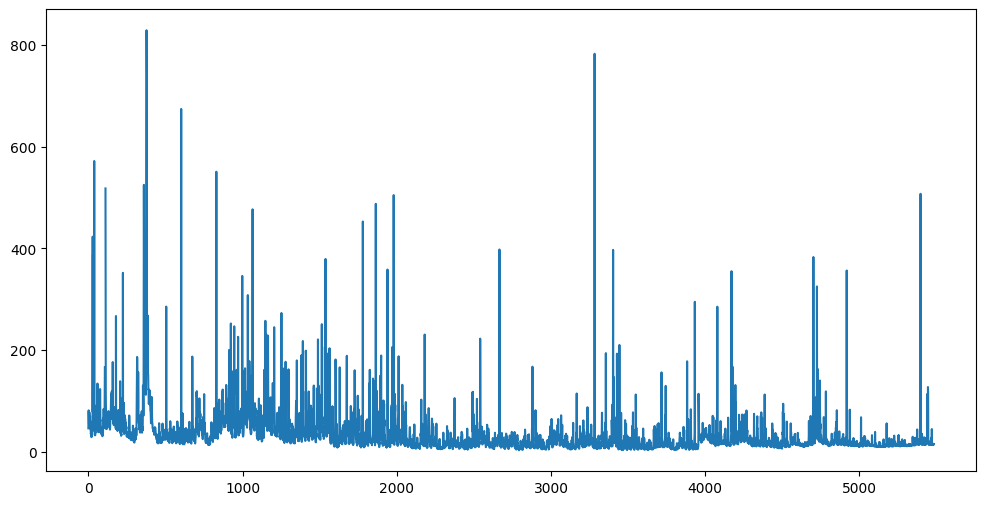

In [184]:
gas_average.plot(figsize = (12,6));

In [185]:
gas_average = gas_average.apply(lambda x: x if x < 300 else np.nan)

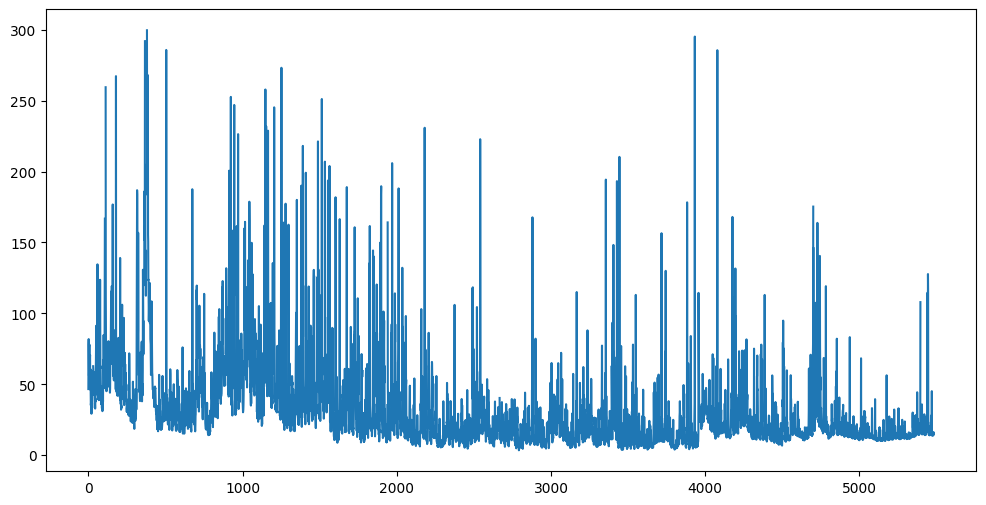

In [186]:
gas_average.plot(figsize = (12,6));

In [187]:
sum(gas_average.isnull()) # 39 outliers

39

In [188]:
df_average = pd.DataFrame({'average_gas_fee': gas_average, 'avgGas': gas_dataset['avgGas'], 'timestamp' : gas_dataset['timestamp']})

In [189]:
df_average.head()

average_gas_fee        avgGas                 timestamp
0           46.670  80868.519046  2022-04-26T13:34:21.641Z
1           78.150  85449.256791  2022-04-26T14:00:09.549Z
2           81.885  82192.413722  2022-04-26T15:00:08.630Z
3           67.235  82451.786800  2022-04-26T16:01:05.379Z
4           56.095  84236.446559  2022-04-26T17:00:58.575Z

In [190]:
df_average['average_gas_fee'] = df_average['average_gas_fee'].fillna(method = 'ffill')

In [191]:
sum(df_average['average_gas_fee'].isnull() == True)

0

In [192]:
# timestamp transformation
def fun(x):
    x = x.replace('T', ' ')[:-11]
    return pd.to_datetime(x, format = '%Y-%m-%d %H')

df_average['timestamp'] = df_average['timestamp'].apply(fun)

In [193]:
df_average

average_gas_fee         avgGas           timestamp
0             46.6700   80868.519046 2022-04-26 13:00:00
1             78.1500   85449.256791 2022-04-26 14:00:00
2             81.8850   82192.413722 2022-04-26 15:00:00
3             67.2350   82451.786800 2022-04-26 16:00:00
4             56.0950   84236.446559 2022-04-26 17:00:00
...               ...            ...                 ...
5479          15.0511  166736.391980 2022-12-11 05:00:00
5480          14.9330  157472.907955 2022-12-11 06:00:00
5481          16.3310  115399.969702 2022-12-11 07:00:00
5482          14.4323  119084.124717 2022-12-11 08:00:00
5483          15.2983  151872.965195 2022-12-11 09:00:00

[5484 rows x 3 columns]

In [194]:
df_average.iloc[-24*90:] # data of the last 90 days (we only need data that start from hour 10
# and beyond, so next we remove samples 3324 and 3325)

average_gas_fee         avgGas           timestamp
3324          17.0700   84367.874722 2022-09-12 08:00:00
3325          11.4250   86081.747525 2022-09-12 09:00:00
3326          10.5850   92232.945200 2022-09-12 10:00:00
3327          30.2300   88143.438267 2022-09-12 11:00:00
3328          33.4100   82982.461422 2022-09-12 12:00:00
...               ...            ...                 ...
5479          15.0511  166736.391980 2022-12-11 05:00:00
5480          14.9330  157472.907955 2022-12-11 06:00:00
5481          16.3310  115399.969702 2022-12-11 07:00:00
5482          14.4323  119084.124717 2022-12-11 08:00:00
5483          15.2983  151872.965195 2022-12-11 09:00:00

[2160 rows x 3 columns]

In [195]:
df_average_90days = df_average.iloc[3326:].reset_index(drop = True)
df_average_90days

average_gas_fee         avgGas           timestamp
0             10.5850   92232.945200 2022-09-12 10:00:00
1             30.2300   88143.438267 2022-09-12 11:00:00
2             33.4100   82982.461422 2022-09-12 12:00:00
3             25.2250   84544.989353 2022-09-12 13:00:00
4             52.2450   89251.971497 2022-09-12 14:00:00
...               ...            ...                 ...
2153          15.0511  166736.391980 2022-12-11 05:00:00
2154          14.9330  157472.907955 2022-12-11 06:00:00
2155          16.3310  115399.969702 2022-12-11 07:00:00
2156          14.4323  119084.124717 2022-12-11 08:00:00
2157          15.2983  151872.965195 2022-12-11 09:00:00

[2158 rows x 3 columns]

In [196]:
df_average.to_csv('average_gas.csv', index = False)
df_average_90days.to_csv('average_gas_90days.csv', index = False)

## Preprocessing Crypto Price Data

In [131]:
crypto_price_df = pd.read_csv('crypto_price_90days.csv')
crypto_price_df.head()

UNIX Timestamp         Timestamp  Bitcoin Price (USD)  Ethereum Price (USD)
0    1.660000e+12  2022-09-12 10:01          22195.69118           1750.655946
1    1.660000e+12  2022-09-12 11:03          22180.53379           1746.531098
2    1.660000e+12  2022-09-12 12:04          22292.74291           1751.864674
3    1.660000e+12  2022-09-12 13:01          22359.17007           1747.678093
4    1.660000e+12  2022-09-12 14:03          22391.44726           1752.387514